# Introduction

Important Info:

Libraries:
- You'll want to import libraries such as numpy, pandas, a plotting library like plotly/matplotlib, and a stats library of your choosing (sklearn for example)

Data Info:
- There are two data files. One has a condensed event set from a randomly chosen hockey game and the other contains Expected Goals values (xg) provided only for shots that successfully hit the net. If an xg value doesn't correspond to a shot event, it should not be counted

- X and Y Coordinates are in Feet and are adjusted such that both teams shoot in the same direction

- Line Carry events are tagged when the puck is carried over either blue line or the centre ice red line

- Binary columns that have values of 0 or 1 indicate 0=No, 1=Yes

- Successfull passes are completed passes, successful shots are shots on net

Please show all work, keep written answers succinct and to the point and most of all, thanks for your time and good luck!

## Q1) 
### a) Who won the game & what was the score?
### b) Who won the Expected Goals (xg) battle & what was each team's total xg?
### c) What do these two answers tell us about how the two teams played?

In [1]:
# Importing pandas library as pd
import pandas as pd

# Reading data from csv files
df1 = pd.read_csv('Tutorial22_df.csv')
df2 = pd.read_csv('Tutorial22_xG_df.csv')

Team = None


def part_a():
    """  Who won the game & what was the score? """

    global Team  # Declaring global variable for later usage

    # Calculating total goal of each team by grouping
    ds = df1.groupby(['teamid'], as_index=False)['goal'].sum()

    # Storing Team name & its score
    Team = ds.loc[ds['goal'].idxmax()].tolist()[0]
    Score = ds.loc[ds['goal'].idxmax()].tolist()[1]

    print('Team {} won the game, and their score was {}.'.format(Team, Score) + '\n')


def part_b():
    """ Who won the Expected Goals (xg) battle & what was each team's total xg? """

    # Calculating the expected goal value of each team by calculating the mean of xg value of each team
    ds = df2.groupby(['teamid'], sort=True, as_index=False)['xg'].mean()

    # Storing the winner team of Expected goal battle
    Winner = ds.loc[ds['xg'].idxmax()].tolist()[0]

    print('Team {} has won the Expected goal battle'.format(Winner))
    print('Each team''\' total expected goal \n', ds)


def part_c():
    """ More info about performance"""

    print('\n Comparing expected goal value & score of the teams, team {} performed better'.format(Team))


part_a()
part_b()
part_c()


Team 596 won the game, and their score was 4.

Team 596.0 has won the Expected goal battle
Each team' total expected goal 
    teamid        xg
0     596  0.152988
1     724  0.103933

 Comparing expected goal value & score of the teams, team 596 performed better


## Q2)
### a) Which possessionid had the highest total successful passes? 
### b) How many successful passes were there and why do you think this specific possession had so many?

In [2]:
# Importing pandas library as pd
import pandas as pd

# Reading data from csv files
df1 = pd.read_csv('Tutorial22_df.csv')
df2 = pd.read_csv('Tutorial22_xG_df.csv')


def part_a():
    """ Which possessionid had the highest total successful passes? """

    # Filtering the data frame having successful passes
    ds = df1[(df1['eventname'] == 'pass') & (df1['outcome'] == 'successful')]

    # Grouping the filtered data by possessionid
    ds = ds.groupby(['possessionid'], as_index=False)['eventname'].count()

    # Storing the possession id having the max number of successful passes
    P_ID = ds.iloc[ds['eventname'].idxmax()].tolist()[0]

    print('Possession Id - {}, had the highest total successful passes'.format(P_ID) + '\n')



def part_b():
    """ How many successful passes were there and why do you think this specific possession had so many? """

    # Fetching the count of dataset having successful passes
    ds = df1[(df1['eventname'] == 'pass') & (df1['outcome'] == 'successful')].count()

    # Storing the count of such passes
    NumOfSuccesPasses = ds['outcome']

    print('Total Number of successful passes were {}. '.format(NumOfSuccesPasses))
    print('There could be many arguments for this, but I believe it will keep the opponent team busy in maintaining the'
          'defensive mode until your team keeps the possession of puck')

part_a()
part_b()

Possession Id - 417, had the highest total successful passes

Total Number of successful passes were 552. 
There could be many arguments for this, but I believe it will keep the opponent team busy in maintaining thedefensive mode until your team keeps the possession of puck


## Q3)
### a) Using the event data provided along with x/y coordinate columns, can you identify the likely xCoord of each blueline?

In [3]:
# Importing pandas library as pd
import pandas as pd

# Reading data from csv files
df1 = pd.read_csv('Tutorial22_df.csv')


def part_a():
    """ Using the event data provided along with x/y coordinate columns, can you identify the likely xCoord of each
    blueline?"""

    # Filtering the dataset by specific zones & grouping them by possession ID
    dZone = df1[df1["zone"] == "dz"].groupby("possessionid")
    oZone = df1[df1["zone"] == "oz"].groupby("possessionid")

    # Calculating the mean of x-coordinates of each zones
    oZone_xCoord = oZone["xcoord"].mean()
    dZone_xCoord = dZone["xcoord"].mean()

    print("Likely xCoord of Offensive blue line : ", oZone_xCoord.mean())
    print("Likely xCoord of Defensive blue line : ", dZone_xCoord.mean())


part_a()


Likely xCoord of Offensive blue line :  57.32828397442983
Likely xCoord of Defensive blue line :  -59.50543193527885


## Q4)
### a) Create a subset of all shot attempts in the game and then with the plotting library of your choice, produce one scatter plot per team to illustrate where their shots were located and highlight any goals that were scored.
### b) Describe in 2-4 sentences your findings for each team.

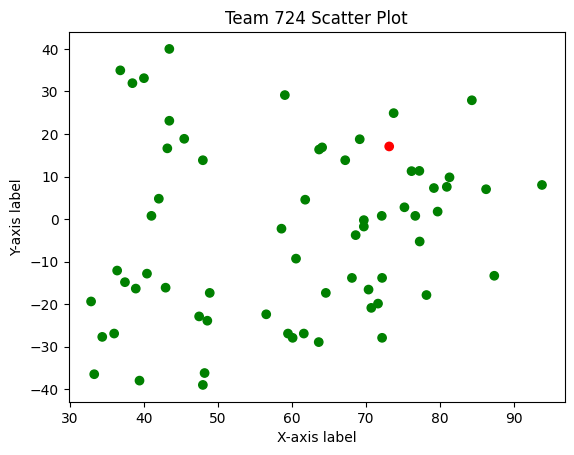

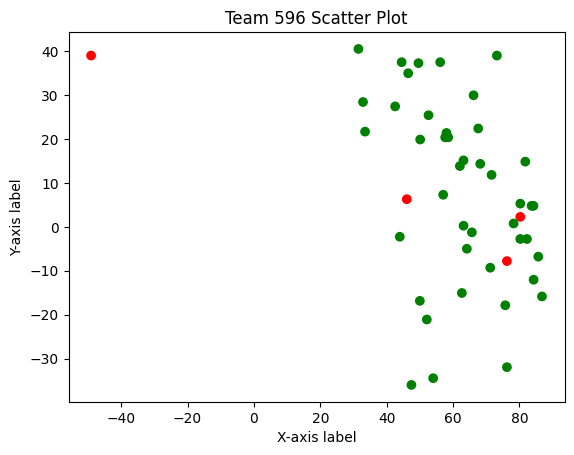

Team 596 has made 4 goals as indicated by red dots. The graph design implies that except one outlier goal shot, all the shots were present on the positive x coordinates
Team 724 has made just 1 goal as indicated by red dot. The graph design implies that their shots were evently distributed over the field.


In [4]:
# Importing pandas  & matplotlib library
import pandas as pd
import matplotlib.pyplot as plt

# Reading data from csv files to create dataframe
df1 = pd.read_csv('Tutorial22_df.csv')
df2 = pd.read_csv('Tutorial22_xG_df.csv')

# Filtering data by team  & eventname
T1 = df1[(df1['teamid'] == 724) & (df1["eventname"] == "shot")]
T2 = df1[(df1['teamid'] == 596) & (df1["eventname"] == "shot")]

# Consolidating individual team data to create a master data
Data = [[T1[['xcoord']], T1[['ycoord']], T1[['goal']].values.tolist()],
        [T2[['xcoord']], T2[['ycoord']], T2[['goal']].values.tolist()]]


def scatterPlot(x, y, z, TeamNum=None, **kwargs):
    """ This function when passed with x, y cordinates along with z value will construct a 2D scatter plot"""

    # Define colors to highlight goaled shots with red
    colors = ["red" if i[0] == 1 else "green" for i in z]

    # Create scatter plot
    plt.scatter(x, y, color=colors)

    # Adding labels and scatter plot title
    plt.xlabel("X-axis label")
    plt.ylabel("Y-axis label")
    plt.title("Team {} Scatter Plot".format(TeamNum))

    # Display plot
    plt.show()


def comments():
    """ Comments on scatter plot"""

    print('Team 596 has made 4 goals as indicated by red dots. The graph design implies that except one '
          'outlier goal shot, all the shots were present on the positive x coordinates')

    print('Team 724 has made just 1 goal as indicated by red dot. The graph design implies that their shots were '
          'evently distributed over the field.')


# Calling function to draw plot for the individual teams

scatterPlot(x=Data[0][0], y=Data[0][1], z=Data[0][2], TeamNum=724)
scatterPlot(x=Data[1][0], y=Data[1][1], z=Data[1][2], TeamNum=596)
comments()


## Q5)
### a) If the centre of the net that teams shoot at is located at xCoord=89, yCoord=0, create a column for the distance from each shot to this point. What is the distance of the furthest goal scored in the game?
### b) What is the expected goals (xg) value of this furthest goal and what do you think contributed to this xg value?

In [5]:
# Importing pandas  & numpy library
import pandas as pd
import numpy as np

# Reading data from csv files
df1 = pd.read_csv('Tutorial22_df.csv')
df2 = pd.read_csv('Tutorial22_xG_df.csv')


def part_a():
    """
    If the centre of the net that teams shoot at is located at xCoord=89, yCoord=0, create a column for the
    distance from each shot to this point. What is the distance of the furthest goal scored in the game?
    """

    # Fetching the x & y cordinates from dataframe df1
    x = np.array(df1[['xcoord']])
    y = np.array(df1[['ycoord']])

    # Adding a new column called distance which stores distance between centre and specified coordinates
    df1['distance'] = ((89 - x) ** 2 + y ** 2) ** 0.5   # pythagoras theorem to calc distance

    # Goal data furthest from centre of the net
    Farthest_Goal_Data = df1.loc[df1['distance'].idxmax()]

    print('Distance of the furthest goal scored in the game is {}'.format(Farthest_Goal_Data[['distance']].tolist()[0]))
    return Farthest_Goal_Data


def part_b(Farthest_Goal_Data):
    """
    What is the expected goals (xg) value of this furthest goal and what do you think contributed to this xg
    value?
    """
    # Connecting both the tables with compilegametime as a foreign key to pull out xg value of the farthest goal shot
    compiledgametime = float(Farthest_Goal_Data[['compiledgametime']].tolist()[0])

    # Storing xg value
    xg_value = (df2[df2['xg'] == compiledgametime])

    # Checking if xg value exists for that goal
    if len(xg_value) == 0:
        print('No corresponding xg value found!')
    else:
        print('The corresponding xg value for the maximum distance calculated is {}'.format(compiledgametime))


Farthest_Goal_Data = part_a()
part_b(Farthest_Goal_Data)


Distance of the furthest goal scored in the game is 188.38995295426992
No corresponding xg value found!


## Q6)
### a) If a "Shot Assist" is defined as a sequence of events with the same possessionid where there is: 1) a successful pass followed by 2) a successful reception by a teammate and then without giving up the puck 3) the receiving player has a shot attempt, create a column flagging shots that have a Shot Assist. Which player(s) had the most assisted shots in the game and how many assisted shots did they have?

### Hint: This can be done using iterrows() or using shift() logic. Consider if you should include ALL event rows and beware of sorting!

In [6]:
# Importing pandas library as pd
import pandas as pd

# Reading data from csv files
df1 = pd.read_csv('Tutorial22_df.csv')
df2 = pd.read_csv('Tutorial22_xG_df.csv')

# Defining global variables
global successful_pass, successful_reception, shot_attempt


def ShotAssist():
    """
    If a "Shot Assist" is defined as a sequence of events with the same possessionid where there is: 1) a
    successful pass followed by 2) a successful reception by a teammate and then without giving up the puck 3) the
    receiving player has a shot attempt, create a column flagging shots that have a Shot Assist. Which player(s) had
    the most assisted shots in the game and how many assisted shots did they have?

    """
    successful_pass, successful_reception, shot_attempt = 0, 0, 0

    # Dictionary to store count of Short Assist. Key: PossessionId, Value: number of triplet variables
    PID_to_ShortAssistCount = {}

    # Sorting the data by possession id in ascending order
    Sorted_df1_data = df1.sort_values(by=['possessionid'], ascending=True)

    # Assigning temporary Possession Id
    tempPid = next(Sorted_df1_data.iterrows())[1][8]

    # Iterating through data row-by-row
    for index, row in Sorted_df1_data.iterrows():

        # Fetching possesion Id
        Pid = row['possessionid']

        # If possession id same as of previous iteration
        if tempPid == Pid:

            # Making counts for successful pass, successful reception & attempted shot
            if row['outcome'] == 'successful':
                if row['eventname'] == 'pass':
                    successful_pass += 1
                elif row['eventname'] == 'reception':
                    successful_reception += 1
            if row['eventname'] == 'shot':
                shot_attempt += 1

        # If possession id has changed compared to previous iteration
        else:
            # Storing the count of Shot assist in dictionary against the possession id
            PID_to_ShortAssistCount[tempPid] = min(successful_pass, successful_reception, shot_attempt)

            # Reinitialize the variables value for the next id
            successful_pass, successful_reception, shot_attempt = 0, 0, 0

            # Updating Possesion Id
            Pid = row['possessionid']
            tempPid = Pid

            # Making counts for successful pass, successful reception & attempted shot
            if row['outcome'] == 'successful':
                if row['eventname'] == 'pass':
                    successful_pass += 1
                elif row['eventname'] == 'reception':
                    successful_reception += 1
            if row['eventname'] == 'shot':
                shot_attempt += 1

    # Sorting the dictionary in the descending order of Assist Count
    PID_to_ShortAssistCount = sorted(PID_to_ShortAssistCount.items(), key=lambda x: x[1], reverse=True)
    PID_to_ShortAssistCount = dict(PID_to_ShortAssistCount)

    # Storing the number of the highest assist count
    higestAssistCount = PID_to_ShortAssistCount[list(PID_to_ShortAssistCount.keys())[0]]

    # Array of Possession ids with the highest assist count
    maxPID_Array = [i for i in PID_to_ShortAssistCount if PID_to_ShortAssistCount[i] >= higestAssistCount]

    # Array to store playerids with max number of assist shots
    PlayersList = []

    for i in maxPID_Array:
        PlayersList.extend(df1[(df1['possessionid'] == i)]['playerid'].tolist())

    print('The below list of players ids have the most number of assisted shots with the number being {}'.format(
        higestAssistCount))
    print(PlayersList)


ShotAssist()


The below list of players ids have the most number of assisted shots with the number being 1
[332856, 332856, 628757, 838211, 538217, 538217, 628757, 838211, 288890, 288890, 538217, 677394, 677394, 288890, 84875, 673651, 628757, 628757, 628757, 628757, 673651, 764371, 84875, 628757, 628757, 797810, 952287, 952287, 952287, 952287, 952287, 485421, 797810, 628757, 628757, 838211, 838211, 628757, 838211, 677394, 677394, 677394, 838211, 838211, 838211, 677394, 677394, 698619, 838211, 677394, 698619, 698619, 677394, 677394, 677394, 698619, 698619, 698619, 628757, 261698, 628757, 261698, 628757, 698619, 890686, 890686, 890686, 673651, 847481, 485421, 485421, 485421, 847481, 393337, 828703, 812630, 812630, 812630, 393337, 828703, 424862, 424862, 600730, 628757, 628757, 261698, 952287, 952287, 952287, 511560, 797810, 797810, 952287, 511560, 332856, 890686, 890686, 538217, 538217, 154967, 332856, 332856, 628757, 154967, 154967, 84875, 698619, 831664, 183489, 698619, 698619, 698619, 698619, 76437

## Q7)
### a) What is highest xg among the goals that were scored and why do you think it was this high? 
### b) Did this goal have a shot assist?

In [7]:
# Importing pandas library as pd
import pandas as pd

# Reading data from csv files
df1 = pd.read_csv('Tutorial22_df.csv')
df2 = pd.read_csv('Tutorial22_xG_df.csv')


def higestXG_count():
    """ What is highest xg among the goals that were scored and why do you think it was this high? """

    # Fetching the compiled game time data from the successful goaled shots
    Goal_Data = df1[(df1['goal'] == 1)]['compiledgametime'].tolist()

    # Array to store xg values for goaled shots
    xg_Array = list()

    # Storing xg values in the array
    for i in Goal_Data:
        xg_Array.append(df2[(df2['compiledgametime'] == i)]['xg'].tolist()[0])

    print('The highest xg among the goals that were scored is {}'.format(max(xg_Array)))
    print('I believe being outside type player and making a successful shot from the offensive zone could be a '
          'deciding factor ')


def comments():
    """ Did this goal have a shot assist? """

    print('\nComments: This goal doesn''\'t have a Shot Assist primary becuase it is the only record for its '
          'possession id = 555, and doesn''\'t have successful pass & successful reception as required')


higestXG_count()
comments()


The highest xg among the goals that were scored is 0.999534607
I believe being outside type player and making a successful shot from the offensive zone could be a deciding factor 

Comments: This goal doesn't have a Shot Assist primary becuase it is the only record for its possession id = 555, and doesn't have successful pass & successful reception as required


## Q8) 
### a) Consider other shots with high xg values, without engineering any additional features (aside from the columns you've already been asked to create in the questions above), use a statistical technique of your choice to show the highest predictors of a goal within this dataset.
### b) Please explain your reasoning for choosing this technique and explain your findings

### Hint: look back at the columns you were asked to create, along with the columns already provided in the event dataset, what would lead to dangerous shot attempts?

In [8]:
# Importing libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Reading the data from files
df1 = pd.read_csv('Tutorial22_df.csv')
df2 = pd.read_csv('Tutorial22_xG_df.csv')


def addingDistanceCol():
    # Fetching the x & y cordinates from dataframe df1
    x = np.array(df1[['xcoord']])
    y = np.array(df1[['ycoord']])

    # Adding a new column called distance which stores distance between centre and specified coordinates
    df1['distance'] = ((89 - x) ** 2 + y ** 2) ** 0.5  # pythagoras theorem to calc distance


def StatModel():
    addingDistanceCol()

    # Merging both the dataframes based on compiled game time
    df = pd.merge(df1, df2, on=["compiledgametime", 'playerid', 'teamid'])

    xg_shots = df[df['xg'] > 0.5]

    # Dependent variable and independent variables
    Y = xg_shots['xg']
    X = xg_shots[['distance']]

    # Defining the model
    model = sm.Logit(Y, X).fit()
    print(model.summary())

    print('\n\nModel: Used Logit Regression to show highest predictor of goal value which is the distance')
    print('Reason: coefficients, standard errors, p-values, confidence intervals of dependent variable show the '
          'direction and intensity of the link between each predictor variable and the independent variable.')


StatModel()


Optimization terminated successfully.
         Current function value: 0.357702
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                     xg   No. Observations:                    2
Model:                          Logit   Df Residuals:                        1
Method:                           MLE   Df Model:                            0
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                     inf
Time:                        03:43:26   Log-Likelihood:               -0.71540
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
distance       0.0852      0.134      0.638      0.523      -0.177       0.347


Model: Used Logit Regressio

C:\Users\kunaa\Documents\Kunaal Gupta\SportLogic Interview\venv\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\kunaa\Documents\Kunaal Gupta\SportLogic Interview\venv\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\kunaa\Documents\Kunaal Gupta\SportLogic Interview\venv\lib\site-packages\statsmodels\discrete\discrete_model.py:3511: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.llf/self.llnull
